# Part I - (Prosper Loan Data Exploration)
## by (Ibiwoye Bisola)

## Introduction
> The data set contains 113,937 loans with 81 variables partitioned into columns. The variables includes LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, estimatedloss, estimatedReturn, investors and a lot more.




In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#load the data with pandas read_csv

df = pd.read_csv('prosperLoanData.csv')
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [117]:
#get information about the data set.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
#investigate the dimension of the data set

df.shape

(113937, 81)

### What is the structure of your dataset?

> The data set contained 113937 entries arranged in the rows and 81 variables partitioned into columns.

### What is/are the main feature(s) of interest in your dataset?

> What factors affects the annual percentage rate (BorrowerAPR).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that Term, ProsperScore, Occupation, EmployementStatus, DebtToIncomeRatio, IncomeRange, StatedMonthlyIncome, MonthlyLoanPayment, LoanOriginalAmount and Investors may have influence on the BorrowerAPR.

In [3]:
#create subset columns from the dataset.

columns = ['LoanOriginalAmount', 'Term', 'ProsperScore','BorrowerAPR', 'BorrowerRate', 'Occupation', 'OnTimeProsperPayments',
          'EmploymentStatus', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Investors','AvailableBankcardCredit']

subset_var = df[columns]

In [5]:
#check out the selected columns

subset_var.head()

,LoanOriginalAmount,Term,ProsperScore,BorrowerAPR,BorrowerRate,Occupation,OnTimeProsperPayments,EmploymentStatus,DebtToIncomeRatio,StatedMonthlyIncome,MonthlyLoanPayment,Investors,AvailableBankcardCredit
0,9425,36,NaN,0.16516,0.1580,Other,NaN,Self-employed,0.17,3083.333333,330.43,258,1500.0
1,10000,36,7.0,0.12016,0.0920,Professional,NaN,Employed,0.18,6125.000000,318.93,1,10266.0
2,3001,36,NaN,0.28269,0.2750,Other,NaN,Not available,0.06,2083.333333,123.32,41,NaN
3,10000,36,9.0,0.12528,0.0974,Skilled Labor,NaN,Employed,0.15,2875.000000,321.45,158,30754.0
4,15000,36,4.0,0.24614,0.2085,Executive,11.0,Employed,0.26,9583.333333,563.97,20,695.0


In [63]:
# check the structure of the subset.

subset_var.shape

(113937, 13)

In [69]:
# check out the columns

df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [71]:
# convert value counts into list to be used for ordered categories. 

employment_order = df['EmploymentStatus'].value_counts().index.tolist()
print(employment_order)

['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other', 'Part-time', 'Not employed', 'Retired']


In [72]:
term_order = df['Term'].value_counts().index.tolist()
print(term_order)

[36, 60, 12]


In [73]:
score_order = df['ProsperScore'].value_counts().index.tolist()
print(score_order)

[4.0, 6.0, 8.0, 7.0, 5.0, 3.0, 9.0, 2.0, 10.0, 11.0, 1.0]


In [104]:
income_order = df['IncomeRange'].value_counts().index.tolist()
print(income_order)

['$25,000-49,999', '$50,000-74,999', '$100,000+', '$75,000-99,999', 'Not displayed', '$1-24,999', 'Not employed', '$0']


In [101]:
# convert the qualitative variables into ordered categorical types.

cat_var_dict = {'EmploymentStatus': ['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other', 'Part-time', 'Not employed', 'Retired'],
                'Term': [36, 60, 12],
                'ProsperScore': [4.0, 6.0, 8.0, 7.0, 5.0, 3.0, 9.0, 2.0, 10.0, 11.0, 1.0],
               'IncomeRange': ['$25,000-49,999', '$50,000-74,999', '$100,000+', '$75,000-99,999', 'Not displayed', '$1-24,999', 'Not employed', '$0']}
                
for var in cat_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = cat_var_dict[var])
    df[var] = df[var].astype(ordered_var)

>What is the distribution of employment status?

In [19]:
def plot_bargraph(data, label, title, order, x=None, y=None, figsize=None, rotation=None, log=None):
    if figsize is None:
        figsize = [6.4, 4.8]
    plt.figure(figsize=figsize)
    default_color = sns.color_palette()[0]
    if log is not None:
        ax = sns.countplot(data=data, x=x, y=y, color=default_color, order=order)
        plt.xticks(rotation=rotation)
        ax.set_yscale(log)
        plt.xlabel(label)
        plt.title(title)
        plt.show()
    else:
        sns.countplot(data=data, x=x, y=y, color=default_color, order=order)
        plt.xticks(rotation=rotation)
        plt.xlabel(label)
        plt.title(title)
        plt.show()


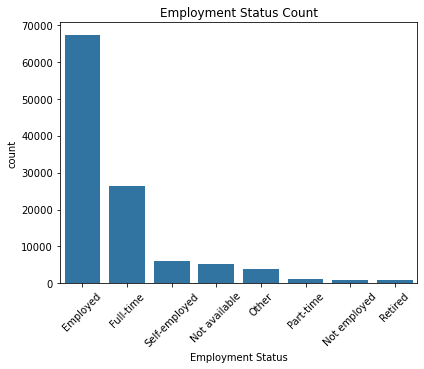

In [22]:
# plot employment status on a bar chart, using the index to create ordered categories.

employment_order = df['EmploymentStatus'].value_counts().index

plot_bargraph(subset_var, 'Employment Status', 'Employment Status Count', employment_order, x='EmploymentStatus', rotation=45 )

> As expected, people in the employed categories are more than the not employed and retired. This implies people who are employed have means of paying back loans borrowed, an employed status can serve as a surety for loan repayment.

> What is the term of loan distribution like?

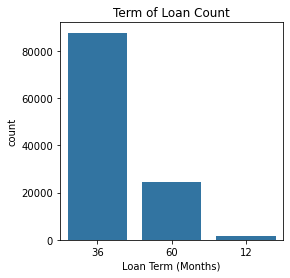

In [23]:
# plot loan term on a bar chart.

term_order = df['Term'].value_counts().index
plot_bargraph(subset_var, 'Loan Term (Months)', 'Term of Loan Count', term_order, x='Term', figsize=[4, 4])

> People borrow more on loans that spans across 3 years (36 months) than those that span across 5 years (60 months) and 1 year (12 months). This may be because loans that spans for 5 years may attract more interests and the amount of loan may take more one year to clear.

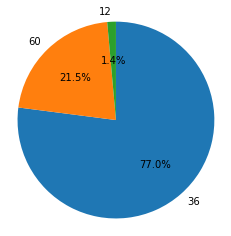

In [8]:
# plot loan term on a pie chart to see the proportion each term occupies.

term_order = subset_var['Term'].value_counts()

plt.pie(term_order, labels=term_order.index, startangle = 90, counterclock = False, autopct='%1.1f%%')

plt.axis('square');

>The proportion each term occupies is more evidence in the pie chart, loan that span for 36 months is 77% of the prosper loan while 21.5% covered the 60 months term and the 12 months term is only 1.4%.

> What is prosper score distribution.

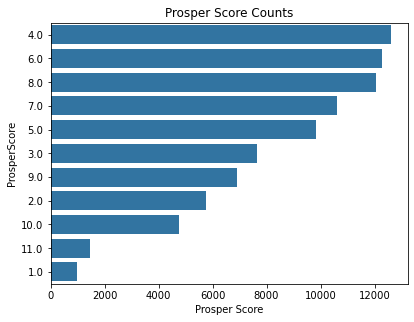

In [24]:
# plot prosper score on an horizontal bar chart.

score_order = df['ProsperScore'].value_counts().index
plot_bargraph(subset_var, 'Prosper Score', 'Prosper Score Counts', score_order, y='ProsperScore')

> Prosper score serve as rating scale for borrower's credit worthiness. People with low credit score "1.0" has the lowest number, followed by people with high credit score "11.0". This means only few people have attained the highest level of credit worthiness and only few people of low credit worthiness are being given loan.

> What is the distribution of the annual percentage rate?

In [31]:
def hist_graph(data, x, label, title, bins, xlim=None):
    plt.hist(data=data, x=x, bins=bins)
    plt.xlabel(label)
    plt.title(title)
    plt.xlim(xlim)
    plt.show()

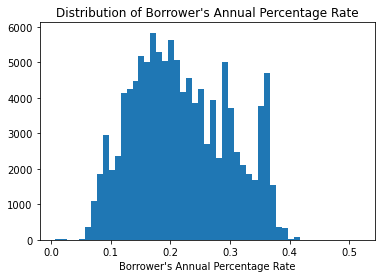

In [32]:
# plot annual percentage rate on an histogram.

bins = np.arange(subset_var.BorrowerAPR.min(), subset_var.BorrowerAPR.max()+0.01, 0.01)
hist_graph(subset_var, 'BorrowerAPR', 'Borrower\'s Annual Percentage Rate', 'Distribution of Borrower\'s Annual Percentage Rate', bins)

>The distribution is bell shaped with the highest point more visible.

> What is the distribution of debt to income ratio?

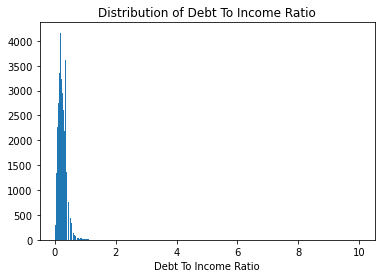

In [33]:
# plot an histogram for debt to income ratio.

bins = np.arange(subset_var.DebtToIncomeRatio.min(), subset_var.DebtToIncomeRatio.max()+0.01, 0.01)
hist_graph(subset_var, 'DebtToIncomeRatio', 'Debt To Income Ratio', 'Distribution of Debt To Income Ratio', bins)

> The distribution falls between 0 and 1, so i make that the limit for the plot.

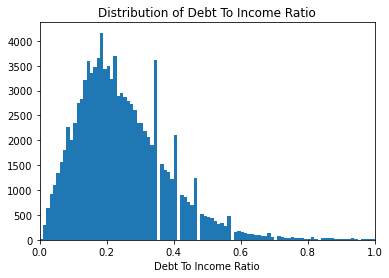

In [34]:
# plot an histogram for debt to income ratio using xlim.

bins = np.arange(subset_var.DebtToIncomeRatio.min(), subset_var.DebtToIncomeRatio.max()+0.01, 0.01)
hist_graph(subset_var, 'DebtToIncomeRatio', 'Debt To Income Ratio', 'Distribution of Debt To Income Ratio', bins, xlim=(0,1))

> The distribution is right-skewed with the highest point at 0.2

> What is the distribution of occupation?

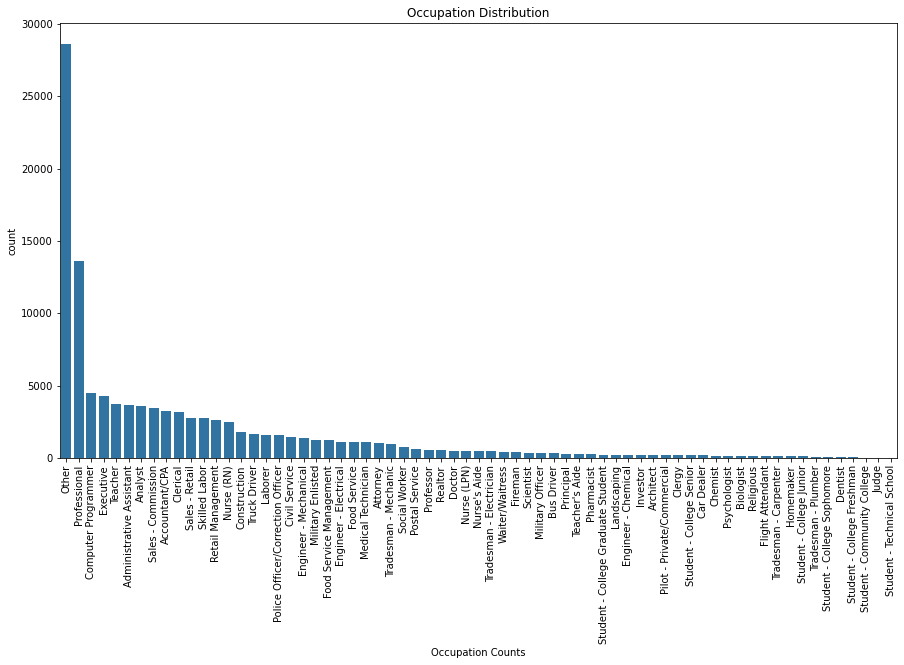

In [21]:
# plot a bar chart for occupation.

cat_order = subset_var['Occupation'].value_counts().index
plot_bargraph(subset_var, 'Occupation Counts', 'Occupation Distribution', cat_order, x='Occupation', figsize=[15,8], rotation=90)

> The distribution is right-skewed with most of the values lost in the tail, so i use a log transformation.

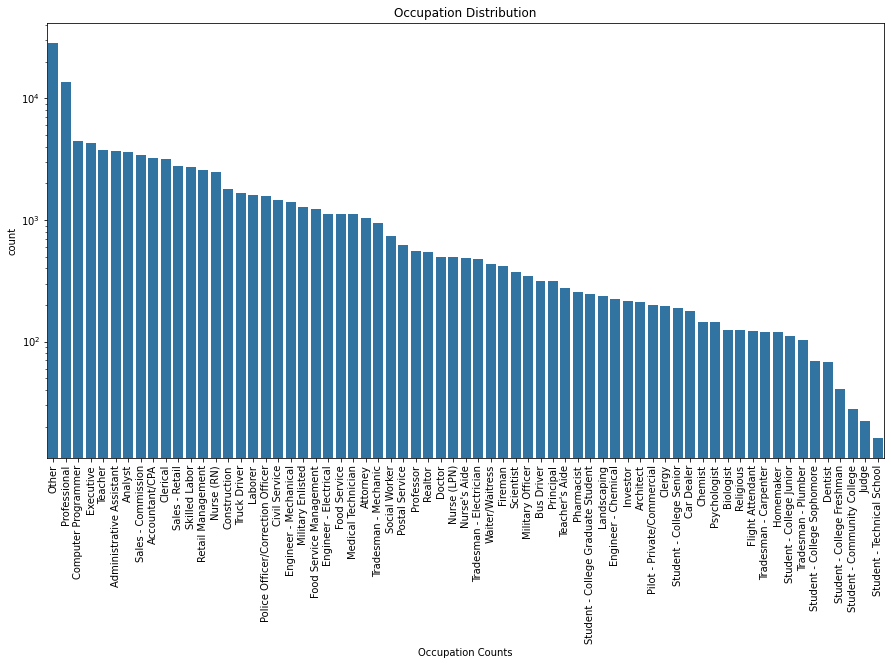

In [20]:
# plot a bar chart for occupation using log scale.

cat_order = subset_var['Occupation'].value_counts().index
plot_bargraph(subset_var, 'Occupation Counts', 'Occupation Distribution', cat_order, x='Occupation', figsize=[15,8], rotation=90, log='log')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The main focus of my exploration is the BorrowerAPR, the distribution is bell shaped with the highest point more visible with a frequency above 5000.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The debt to income ratio distribution falls between 0 and 1, so i make that the limit for the plot.
> Occupation distribution is right-skewed with most of the values lost in the tail, so i use a log transformation.

## Bivariate Exploration


> Is there a relationship between the BorrowerAPR and BorrowerRate?

In [11]:
subset_var['BorrowerAPR'].describe()


count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

In [12]:
subset_var['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

In [4]:
def scatter_plot(data, x, y, xlabel, ylabel, title, alpha):
    plt.scatter(data = data, x = x, y = y, alpha = alpha)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


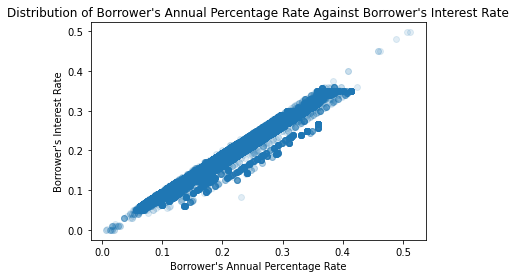

In [5]:
scatter_plot(subset_var, 'BorrowerAPR', 'BorrowerRate', 'Borrower\'s Annual Percentage Rate', 'Borrower\'s Interest Rate', "Distribution of Borrower's Annual Percentage Rate Against Borrower's Interest Rate", 0.125)

> The BorrowerAPR and BorrowerRate are positively correlated as one increases the other increase too, this may be because annual percentage rate(BorrowerAPR) is interest rate (BorrowerRate) plus additional fees or additional costs associated with the transaction. [here](https://www.investopedia.com/terms/a/apr.asp)

> What is the relationship between loan amount and the annual percentage rate?

In [13]:
subset_var['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

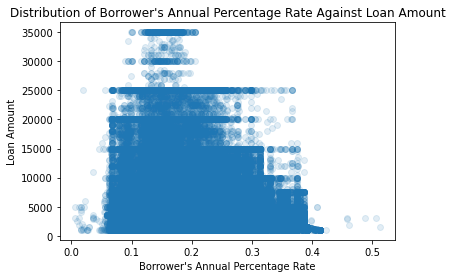

In [6]:
scatter_plot(subset_var, 'BorrowerAPR', 'LoanOriginalAmount', 'Borrower\'s Annual Percentage Rate', 'Loan Amount', "Distribution of Borrower's Annual Percentage Rate Against Loan Amount", 1/8)

> The relationship is hard to interpret, so i swapped the variables in the axes.

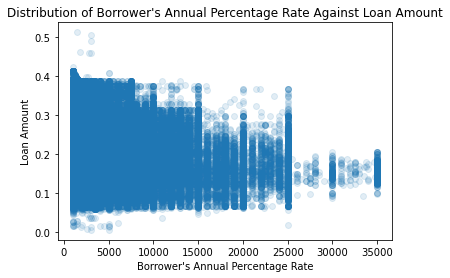

In [7]:
scatter_plot(subset_var, 'LoanOriginalAmount', 'BorrowerAPR', 'Borrower\'s Annual Percentage Rate', 'Loan Amount', "Distribution of Borrower's Annual Percentage Rate Against Loan Amount", 1/8)

>Lower amount has higher rate while higher amount has lower rate, with values below 5000 having the highest rate. This means Loan amount and Borrower's annual percentage rate are negatively correlated, as amount increases, the APR reduces and vice-versa. Real life interpretation of Prosper data mean people who borrow higher amount pay lesser annual rate.

> What is the relationship between the loan term and prosper score.

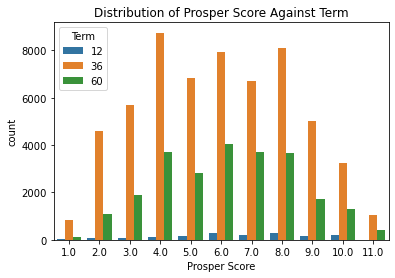

In [8]:
#plot prosper score and loan term in a clustered Barchart

sns.countplot(data = subset_var, x = 'ProsperScore', hue = 'Term')
plt.xlabel("Prosper Score")
plt.title("Distribution of Prosper Score Against Term")
plt.show()


> The highest prosper score does not have data for 12 month loan term, maybe because people with high credit worthiness borrow a larger amount that may take them more than 12 months to pay back. Those with prosper score of 4.0 have the highest 36 months loan term while those with 6.0 prosper score have the highest 60 months loan term.

> Does employment status affect loan amount?

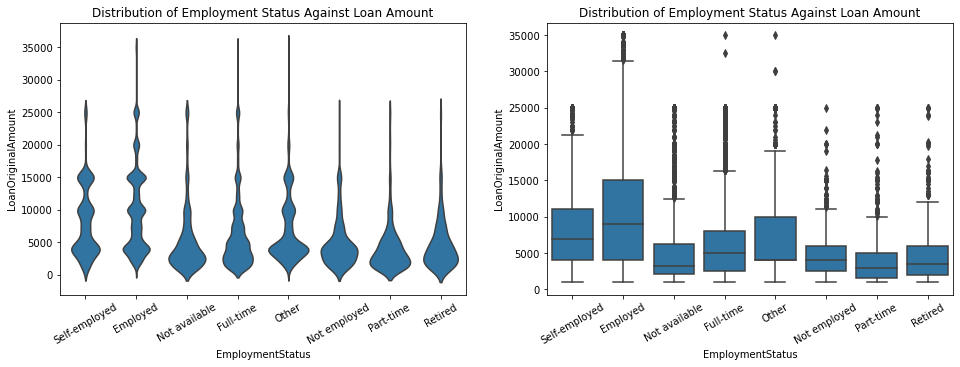

In [9]:
#plot a  box plot and violin plot for employment status and loan original amount side by side for easy interpretation.

plt.figure(figsize = [16, 5])
base_color = sns.color_palette()[0]

plt.subplot(1, 2, 1)
sns.violinplot(data=subset_var, x='EmploymentStatus', y='LoanOriginalAmount', color=base_color, inner=None)
plt.xticks(rotation=30)
plt.title("Distribution of Employment Status Against Loan Amount");


plt.subplot(1, 2, 2)
sns.boxplot(data=subset_var, x='EmploymentStatus', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=30)
plt.title("Distribution of Employment Status Against Loan Amount");


> The employed people have higher loan amount than the unemployed, the highest amount was held by those in employed category, this may be because the company issuing the loan believed those in paid employment have higher certainty of paying loan back in a timely manner than those that are not employed.

> What is the relationship between prosper score and annual percentage rate

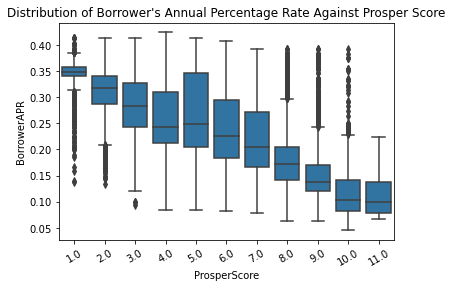

In [10]:
# plot a box plot to show the relationship between prosper score and annual percentage rate.

default_color = sns.color_palette()[0]
sns.boxplot(data=subset_var, x='ProsperScore', y='BorrowerAPR', color= default_color)
plt.xticks(rotation=30)
plt.title("Distribution of Borrower's Annual Percentage Rate Against Prosper Score")
plt.show()

> Low prosper score has high annual percentage rate while high prosper score has low annual percentage rate. This means people with high credit worthiness pay lower interest rate than those with low credit worthiness.

> Does the term of loan affect the annual percentage rate?

In [45]:
def facetgrid_plot(data, col, y, suptitle, col_wrap=None):
    g = sns.FacetGrid(data = data, col = col, col_wrap = col_wrap)
    g.map(plt.hist, y)
    g.fig.suptitle(suptitle)
    plt.subplots_adjust(top=0.8)
    plt.show()

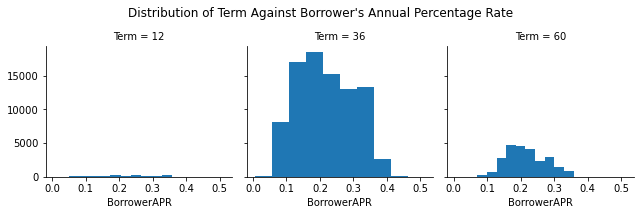

In [46]:
# plot borrower's annual percentage rate against term in a facet grid.

facetgrid_plot(subset_var, 'Term', "BorrowerAPR", "Distribution of Term Against Borrower's Annual Percentage Rate")

> More people fall in the 36 months loan category, however the annual percentage rate is higher for the 36 months loan stretching beyond 0.4 while the annual percentage interest rate for 60 months loan term is lower. This opposed the hypothesis i had that higher loan term means higher interest rate.

> Will prosper score affect the loan amount someone is entitled to?

In [11]:
subset_var["LoanOriginalAmount"].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [12]:
subset_var['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

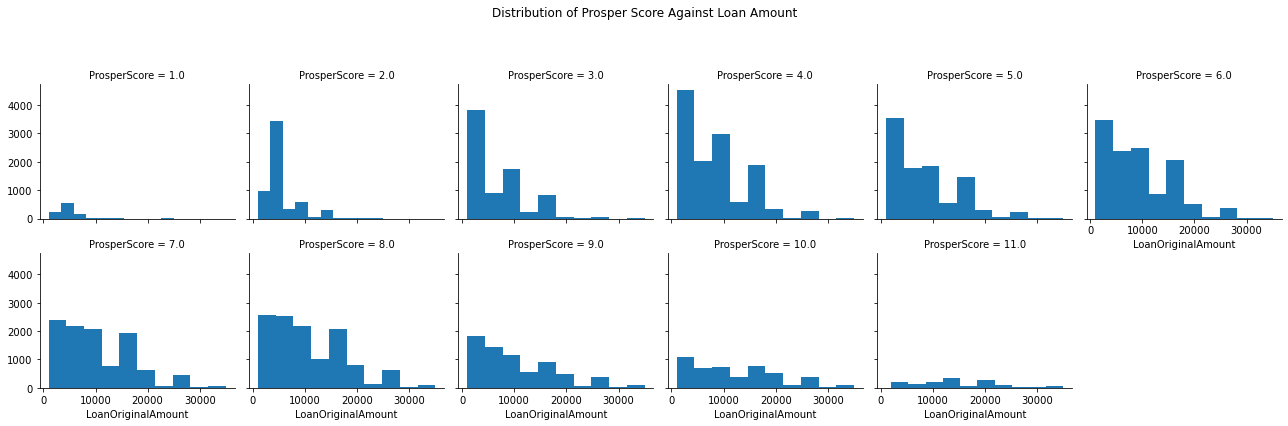

In [49]:
facetgrid_plot(subset_var, 'ProsperScore', "LoanOriginalAmount", "Distribution of Prosper Score Against Loan Amount", col_wrap=6)

>Those with low prosper score of 4.0 and 5.0 has loan amount less than 10,000 and 20,000 respectively. This means the prosper score represent a value for credit worthiness, the loan company may not trust those with low prosper score with larger amount. A lot of people fall between the prosper score of 4.0 to 7.0 while prosper score 1.0 has the lowest number of people followed by those with 11.0 prosper score. This means those with highest prosper score have high credit worthiness and they are fewer than those with low credit worthiness.

> Does higher loan amount require longer term?

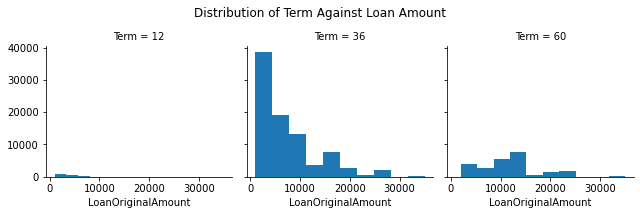

In [42]:
facetgrid_plot(subset_var, 'Term', "LoanOriginalAmount", "Distribution of Term Against Loan Amount")

> 12 months loan term have loan amount less than 10,000 and they are few compared to the 36 months and 60 months loan term. This means people in the 12 month term category borrow smaller amount they can pay back in 12 months.

> Pairwise correlation present in the subset variables.

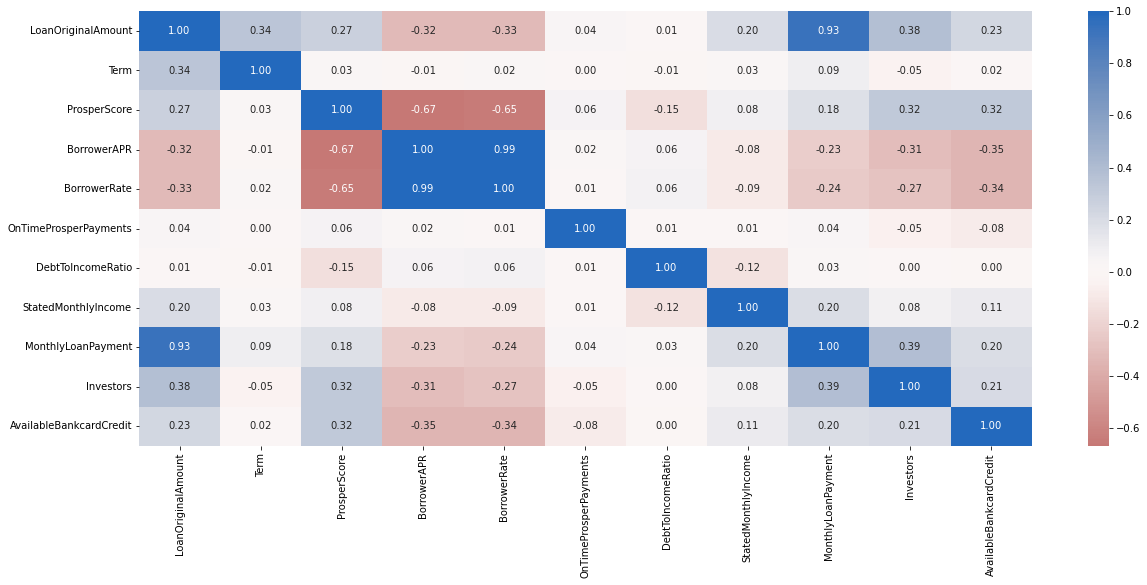

In [14]:
# Pairwise correlation.

plt.figure(figsize = [20, 8])

sns.heatmap(subset_var.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Borrower's annual percentage rate and loan amount are negatively correlated, as amount increases, the APR reduces and vice-versa. The Borrower's annual percentage rate is higher for the 36 months loan stretching beyond 0.4 while the annual percentage interest rate for 60 months loan term is lower. Borrower's annual percentage rate is related to the prosper score in a negative way, low prosper score has high interest rate while high prosper score has low interest rate.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Employment status has a tremenduous effect on loan amount, employed people have higher loan amount than the unemployed. 

## Multivariate Exploration


> What is the relationship between the term of loan, borrower's annual percentage rate and loan amount?

C:\Users\user\anaconda3\anaconda\envs\ajoke\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


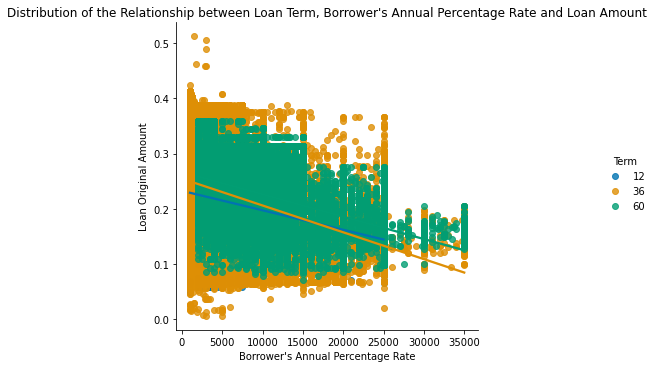

In [17]:
# plot a facet grid, displaying the categorical variable as a color encoding.
g = sns.FacetGrid(data = subset_var, hue = 'Term', size = 5, palette = 'colorblind')

g = g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.04)
g.add_legend()
plt.xlabel('Borrower\'s Annual Percentage Rate')
plt.ylabel('Loan Original Amount')
plt.title("Distribution of the Relationship between Loan Term, Borrower's Annual Percentage Rate and Loan Amount")

plt.show()

> As loan amount increases, the annual percentage rate reduces with loan term 36 months having more values, followed by the 60 months. More people borrow loan that spans for 3 years(36 months) and they pay lesser interest rate as the loan amount increases.

> What is the relationship between some selected qualitative variables? 

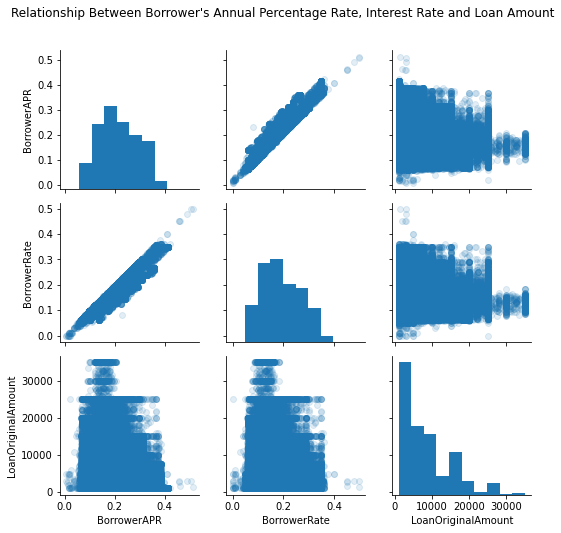

In [55]:
# plot matrix showing the relationship between annual percentage rate, interest rate and loan amount.

g = sns.PairGrid(data = subset_var, vars = ['BorrowerAPR', 'BorrowerRate', 'LoanOriginalAmount'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha = 1/8)
g.fig.suptitle("Relationship Between Borrower's Annual Percentage Rate, Interest Rate and Loan Amount")
plt.subplots_adjust(top=0.9)    
plt.show()

> Loan amount is negatively correlated with BorrowerAPR and BorrowerRate, BorrowerRate is positively correlated with BorrowerAPR. BorrowerAPR and BorrowerRate are normal bell shaped distribution while loan amount is skewed to the right with most of the distribution on the tail.

> What is the relationship between the categorical variables and quantitative variables.

C:\Users\user\anaconda3\anaconda\envs\ajoke\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


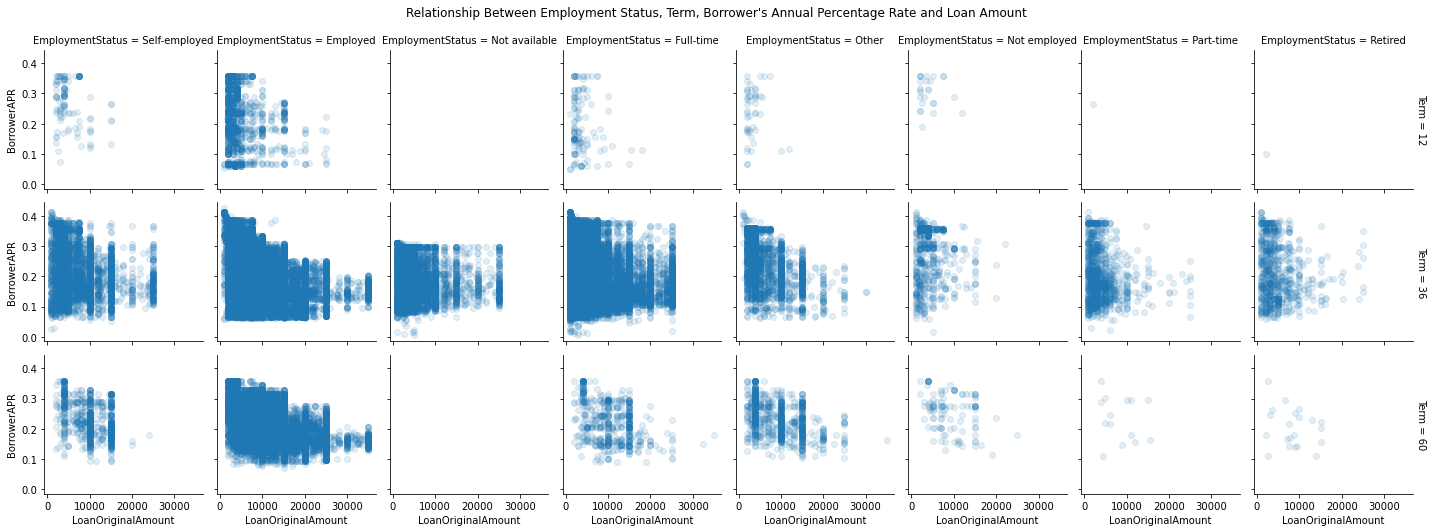

In [56]:
# plot matrix of two categorical variables and two quantitative variables.

g = sns.FacetGrid(data = subset_var, col = 'EmploymentStatus', row = 'Term', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount','BorrowerAPR', alpha = 1/8)
g.fig.suptitle("Relationship Between Employment Status, Term, Borrower's Annual Percentage Rate and Loan Amount")
plt.subplots_adjust(top=0.9)    
plt.show()

> The employed have more values for 12, 36 and 60 months than other categories. Those with 'not available' employment status have no loan amount nor annual interest rate for 12 and 60 months loan term.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Loan amount is negatively correlated with BorrowerAPR and BorrowerRate, BorrowerRate is positively correlated with BorrowerAPR. This supported the previous finding in the bivariate analysis, that higher loan amount attracts low annual percentage rate and interest rate. Uemployed people have lower distribution of loan amount and annual percentage rate. I started with univariate analysis then move to bivariate and multivariate. I did log transformation for a visualization that had all the data lost in the tail of the occupation distribution.

### Were there any interesting or surprising interactions between features?

> Those with 'not available' employment status have no loan amount nor annual interest rate for 12 and 60 months loan term but they have values for loan amount and annual percentage rate for 36 month loan.

## Conclusions
> Selecting some features from the main dataset to explore their relationship with the BorrowerAPR. The loan amount is one of the determining factors of BorrowerAPR, the BorrowerRate structure is similar to the  BorrowerAPR. The prosper score which is a determinant of credit worthiness influences the loan amount and resultantly influence the BorrowerAPR. Most people fall under the 36 months loan term category.
